In [5]:
from sklearn.pipeline import Pipeline, make_pipeline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#read Kor - Window
from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
#- Mac
# %matplotlib inline
# rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [6]:
test_data = pd.read_csv('test.csv')

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             1975 non-null   float64
 4   url_domain_len           1975 non-null   float64
 5   url_hostname_len         1978 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [8]:
test_data.isna().sum()

id                           0
url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

(array([1.941e+03, 2.400e+01, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([   0. ,  163.1,  326.2,  489.3,  652.4,  815.5,  978.6, 1141.7,
        1304.8, 1467.9, 1631. ]),
 <BarContainer object of 10 artists>)

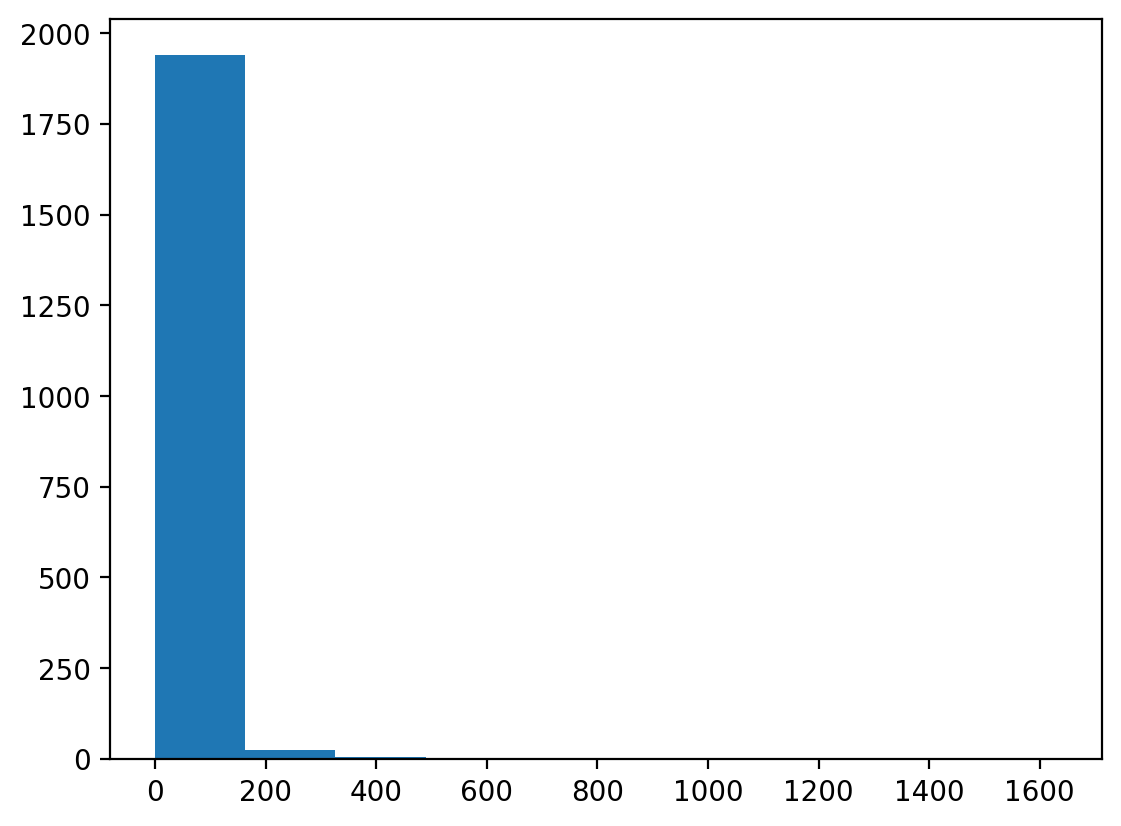

In [9]:
plt.hist(test_data['url_path_len'])

In [10]:
test_data['url_path_len'].max()

1631.0

In [11]:
test_data['url_path_len'].mean()

27.541772151898734

In [12]:
test_data['url_path_len'].min()

0.0

In [13]:
test_data['url_path_len'].median()

12.0

In [14]:
# url_path_len: Na -> median
test_data.loc[test_data['url_path_len'].isnull(),'url_path_len'] = test_data['url_path_len'].median()

(array([ 354., 1115.,  309.,  155.,   27.,    7.,    4.,    2.,    0.,
           2.]),
 array([  4. ,  13.6,  23.2,  32.8,  42.4,  52. ,  61.6,  71.2,  80.8,
         90.4, 100. ]),
 <BarContainer object of 10 artists>)

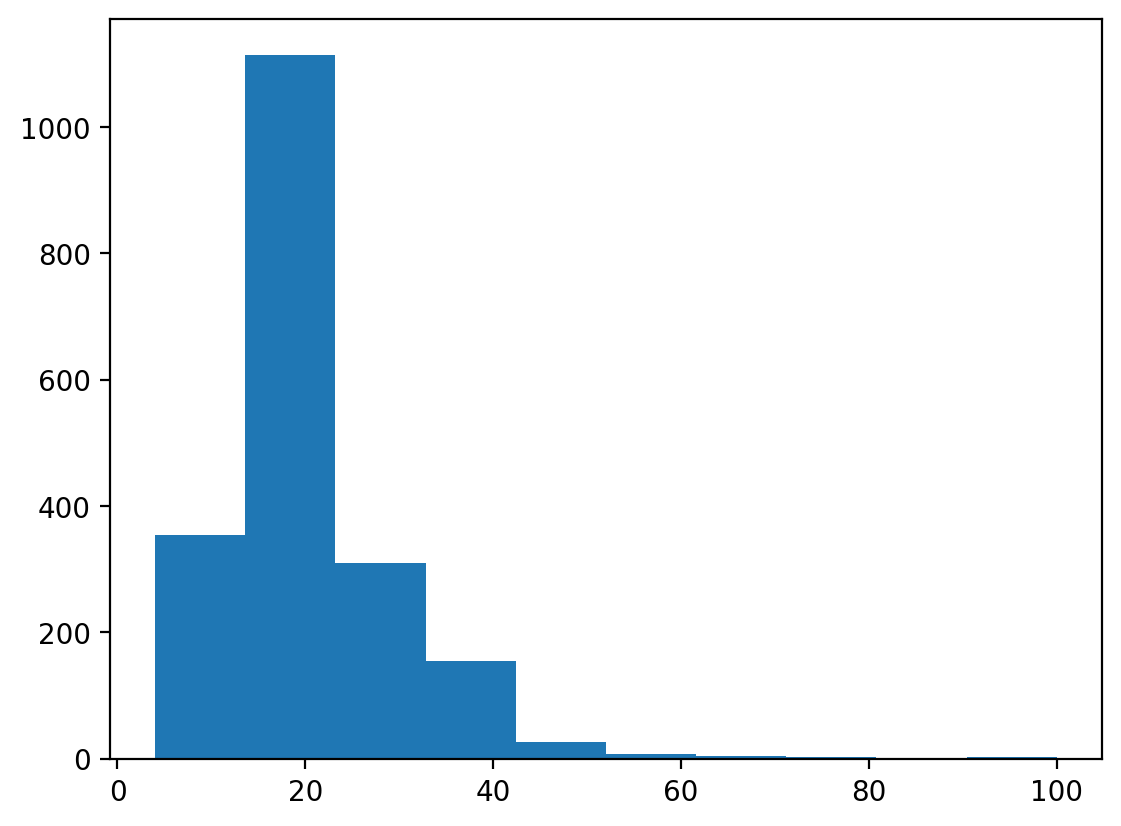

In [15]:
#url_domain_len
plt.hist(test_data['url_domain_len'])

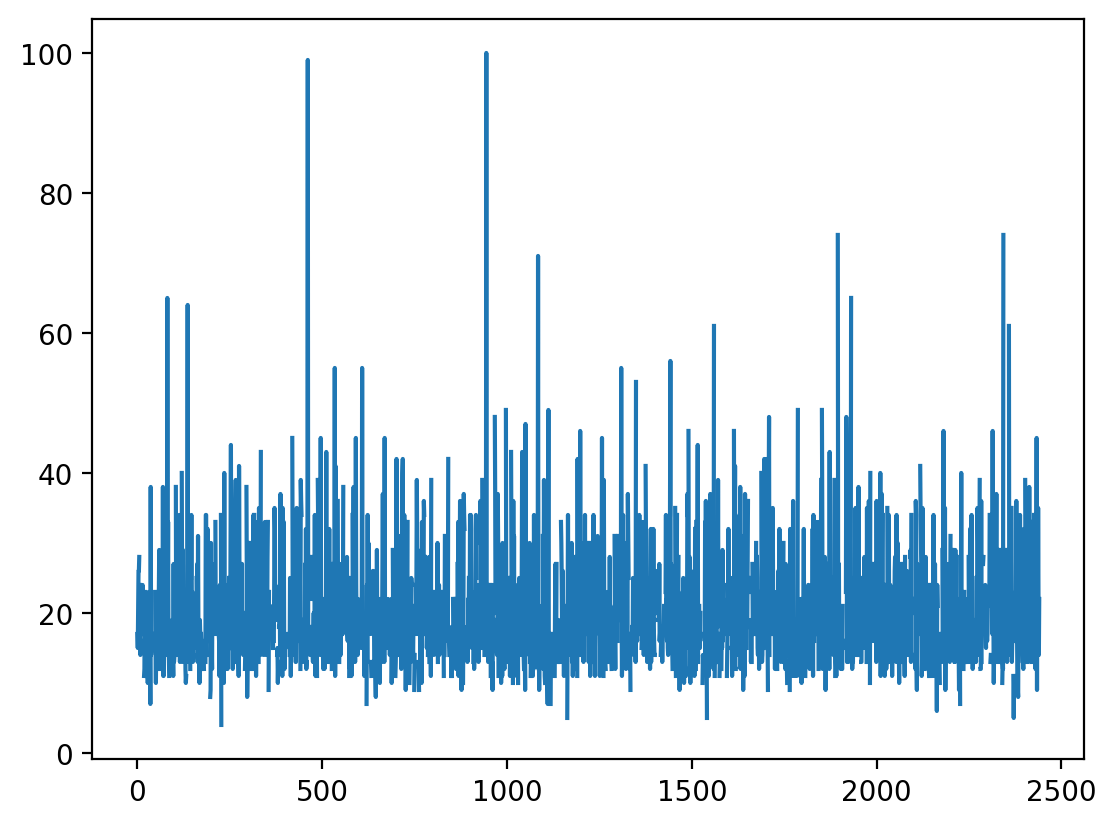

In [16]:
plt.plot(test_data['url_domain_len'])

<AxesSubplot:xlabel='url_domain_len', ylabel='Density'>

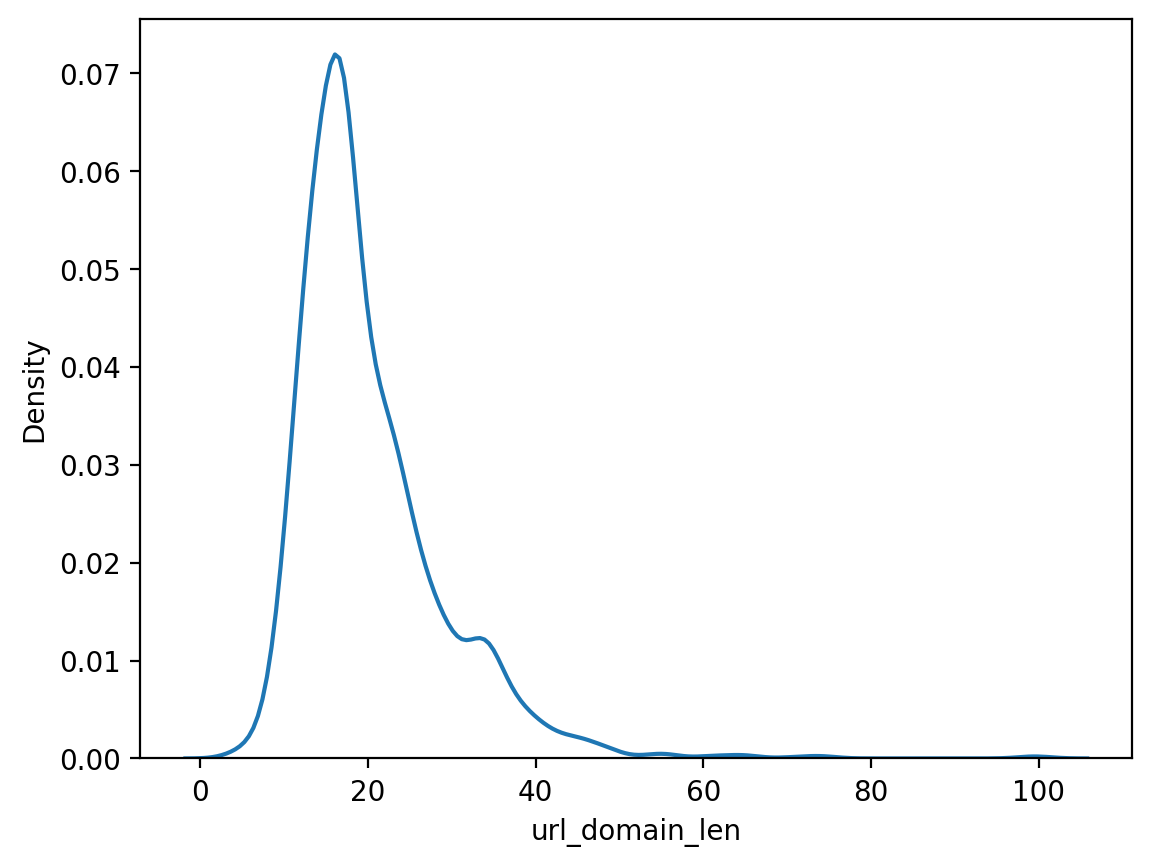

In [17]:
sns.kdeplot(x='url_domain_len', data=test_data)

In [18]:
test_data['url_domain_len'].max()

100.0

In [19]:
test_data['url_domain_len'].min()

4.0

In [20]:
test_data['url_domain_len'].mean()

20.262784810126583

In [21]:
test_data['url_domain_len'].median()

17.0

In [22]:
# 가설1
test_data.nunique()

id                         2441
url_len                     203
url_num_hyphens_dom           7
url_path_len                157
url_domain_len               56
url_hostname_len             57
url_num_dots                 16
url_num_underscores          16
url_query_len                57
url_num_query_para            9
url_ip_present                2
url_entropy                1791
url_chinese_present           1
url_port                      2
html_num_tags('iframe')       9
html_num_tags('script')      64
html_num_tags('embed')        4
html_num_tags('object')       6
html_num_tags('div')        256
html_num_tags('head')         4
html_num_tags('body')         4
html_num_tags('form')        10
html_num_tags('a')          240
html_num_tags('applet')       1
dtype: int64

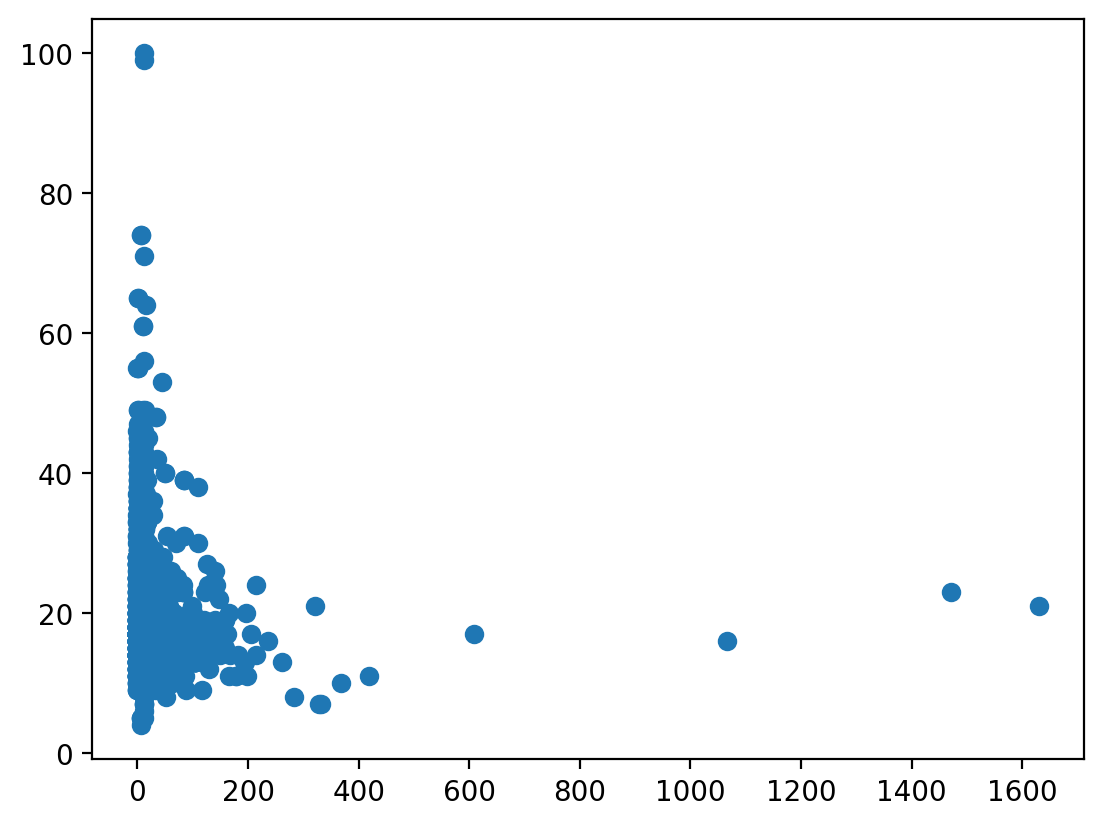

In [23]:
plt.scatter(test_data['url_path_len'], test_data['url_domain_len'])

<AxesSubplot:xlabel='url_domain_len', ylabel='url_hostname_len'>

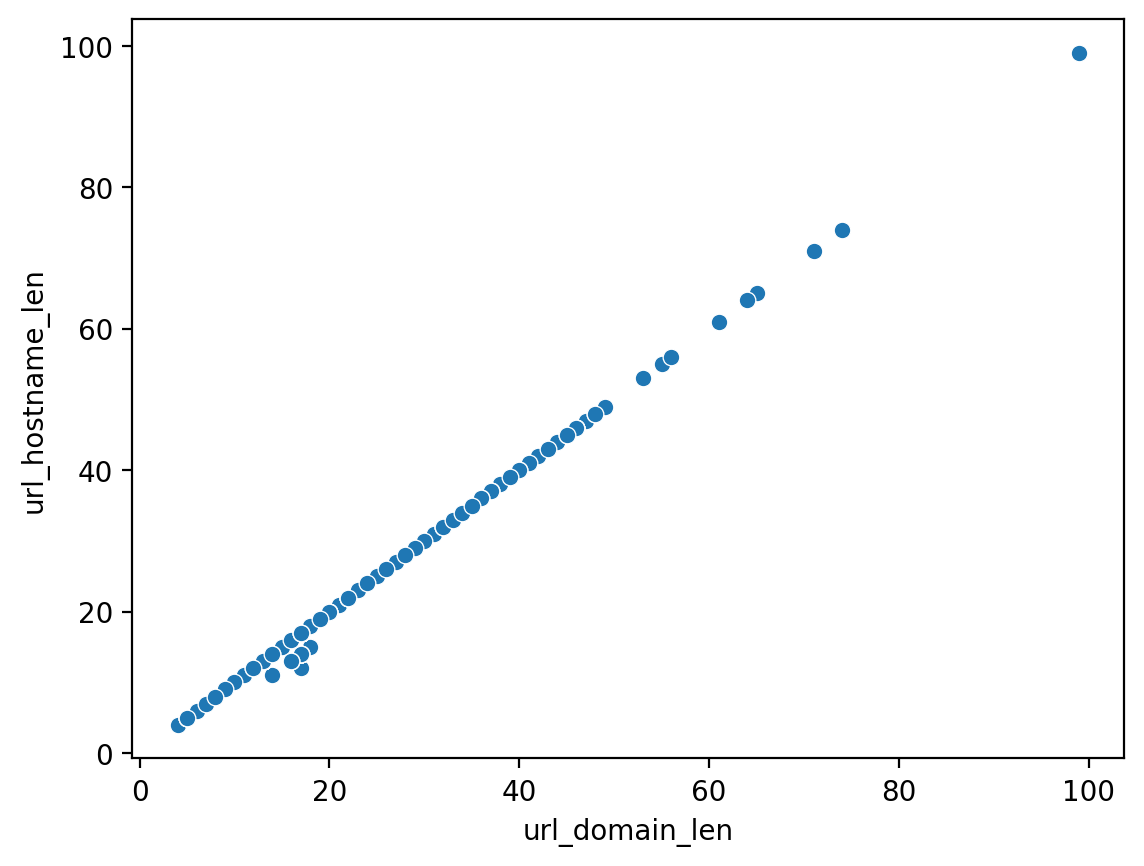

In [24]:
sns.scatterplot(y='url_hostname_len',x='url_domain_len', data=test_data)

<AxesSubplot:xlabel='url_hostname_len', ylabel='url_path_len'>

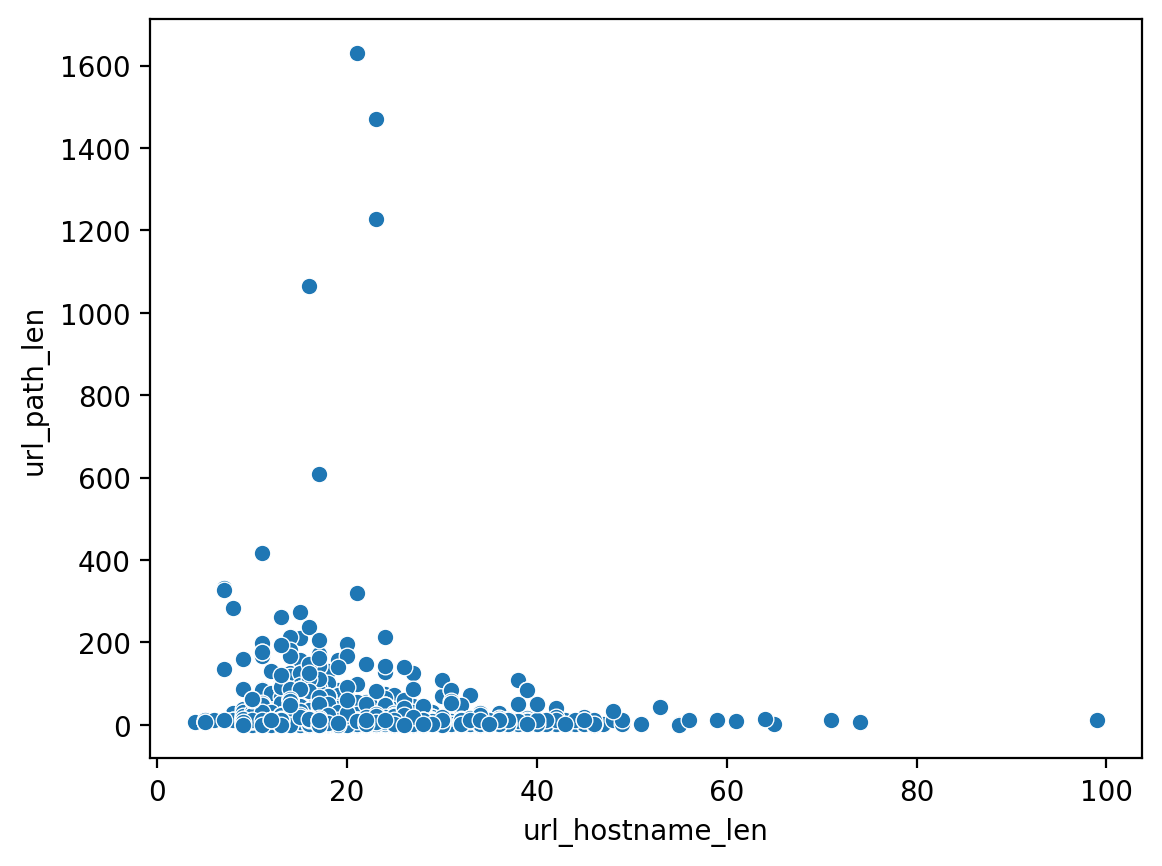

In [25]:
#path len과 hostname, domain len은 연관성이없다. 
sns.scatterplot(y='url_path_len',x='url_hostname_len', data=test_data)

Text(0.5, 0, 'url_hostname_len')

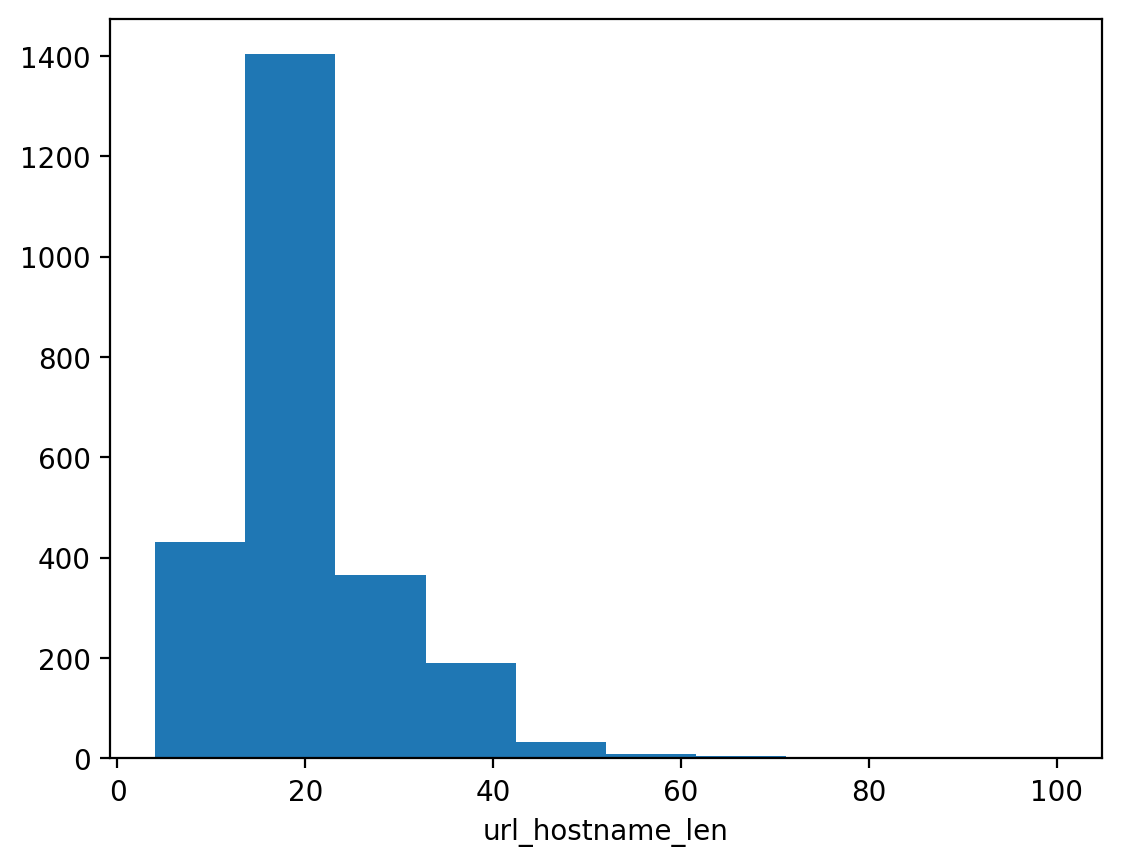

In [48]:

plt.hist(test_data['url_hostname_len'])
plt.xlabel('url_hostname_len')

In [27]:
test_data.loc[test_data['url_domain_len'].isnull() &test_data['url_hostname_len'].isnull() ].shape[0]

101

In [28]:
test_data.loc[test_data['url_domain_len'].isnull() &test_data['url_hostname_len'].notnull()].shape[0]

365

In [29]:
test_data.loc[test_data['url_domain_len'].notnull() &test_data['url_hostname_len'].isnull()].shape[0]

362

In [30]:
test_data.loc[test_data['url_domain_len']!= test_data['url_hostname_len']].shape[0]

849

In [31]:
test_data['url_hostname_len'] = test_data['url_hostname_len'].fillna(test_data['url_domain_len'])

In [32]:
test_data['url_domain_len'] = test_data['url_domain_len'].fillna(test_data['url_hostname_len'])

In [33]:
test_data['url_hostname_len'].max()

100.0

In [34]:
test_data['url_hostname_len'].min()

4.0

In [35]:
test_data['url_hostname_len'].median()

17.0

In [36]:
test_data['url_hostname_len'].mean()

20.257264957264958

(array([ 425., 1309.,  366.,  190.,   33.,    9.,    4.,    2.,    0.,
           2.]),
 array([  4. ,  13.6,  23.2,  32.8,  42.4,  52. ,  61.6,  71.2,  80.8,
         90.4, 100. ]),
 <BarContainer object of 10 artists>)

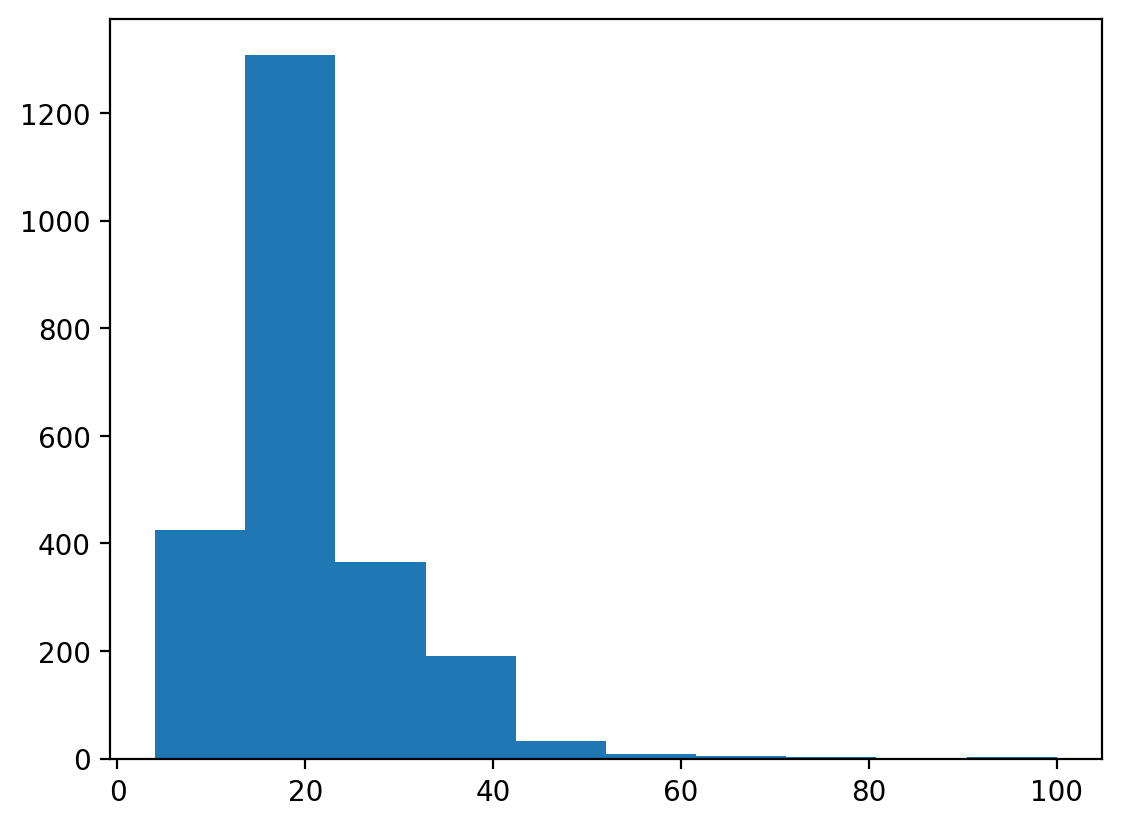

In [37]:
plt.hist(test_data['url_domain_len'])

In [38]:
# url_domain_len: Na -> median
test_data.loc[test_data['url_domain_len'].isnull(),'url_domain_len'] = test_data['url_domain_len'].median()

In [39]:
test_data.loc[test_data['url_hostname_len'].isnull(),'url_hostname_len'] = test_data['url_hostname_len'].median()

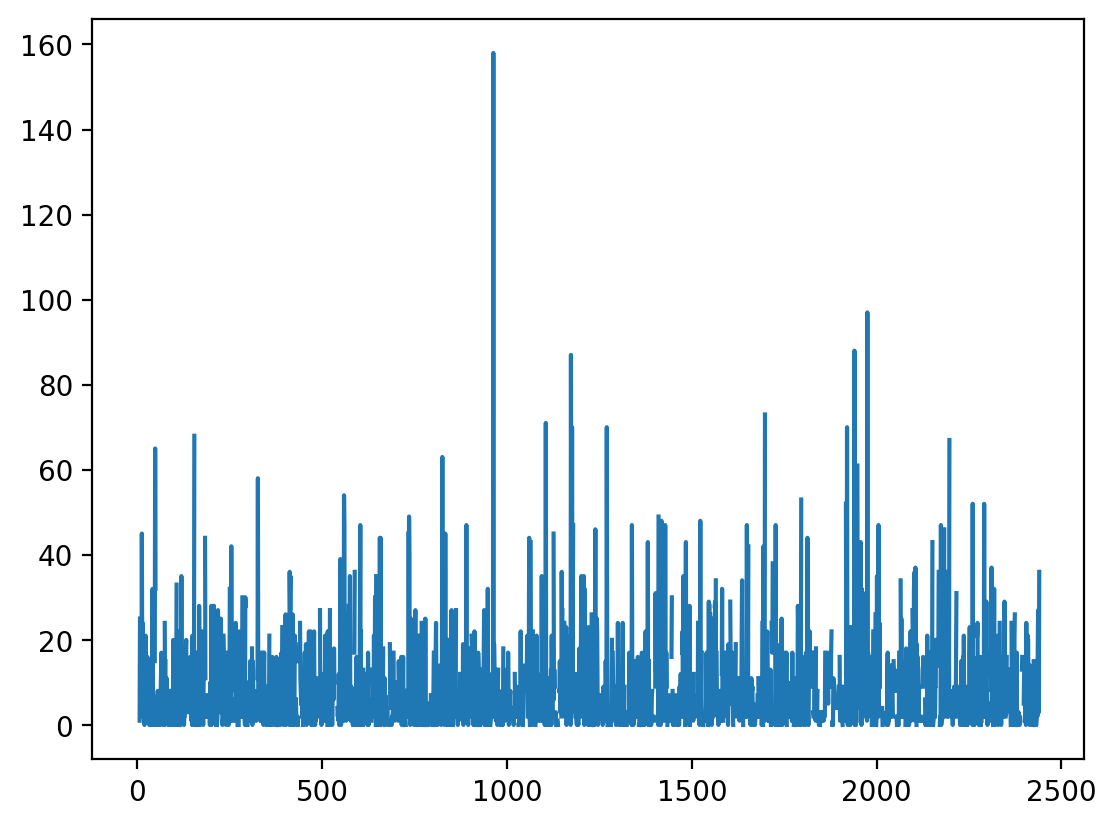

In [40]:
plt.plot(test_data["html_num_tags('script')"])

(array([1.589e+03, 2.950e+02, 6.500e+01, 1.200e+01, 8.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  15.8,  31.6,  47.4,  63.2,  79. ,  94.8, 110.6, 126.4,
        142.2, 158. ]),
 <BarContainer object of 10 artists>)

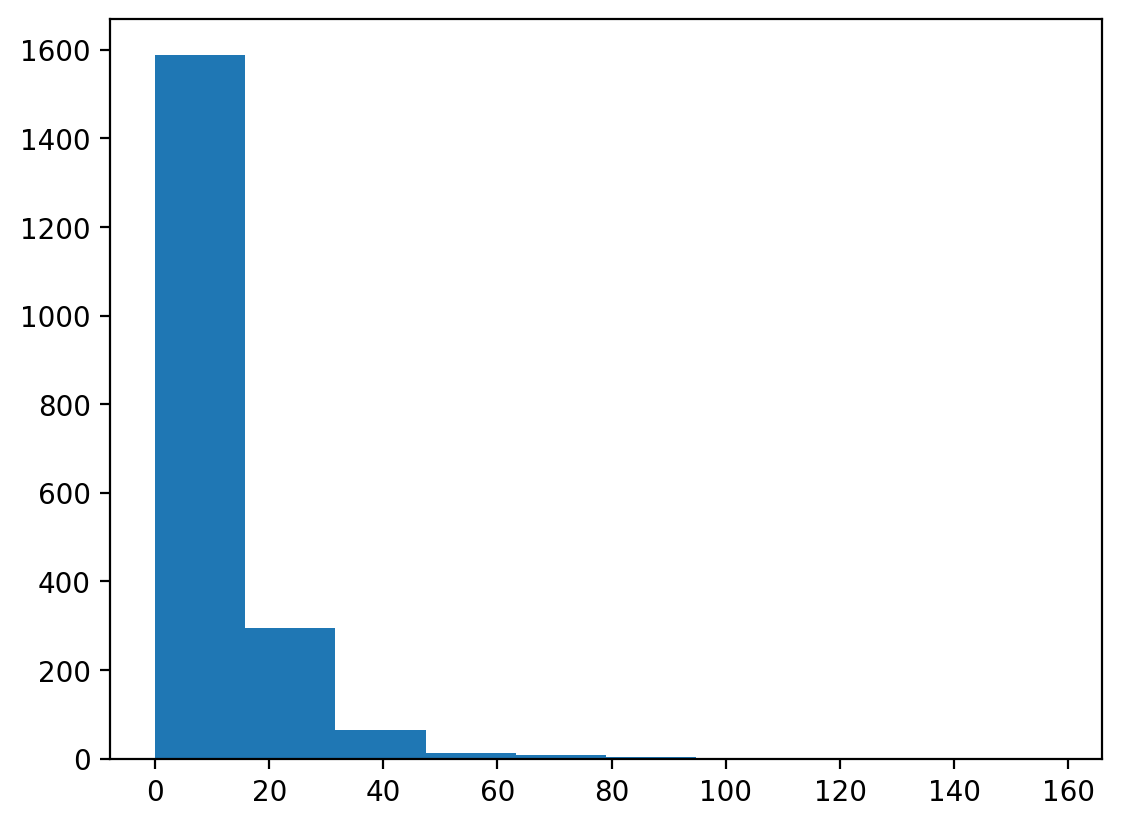

In [41]:
plt.hist(test_data["html_num_tags('script')"])

<AxesSubplot:xlabel="html_num_tags('a')", ylabel="html_num_tags('div')">

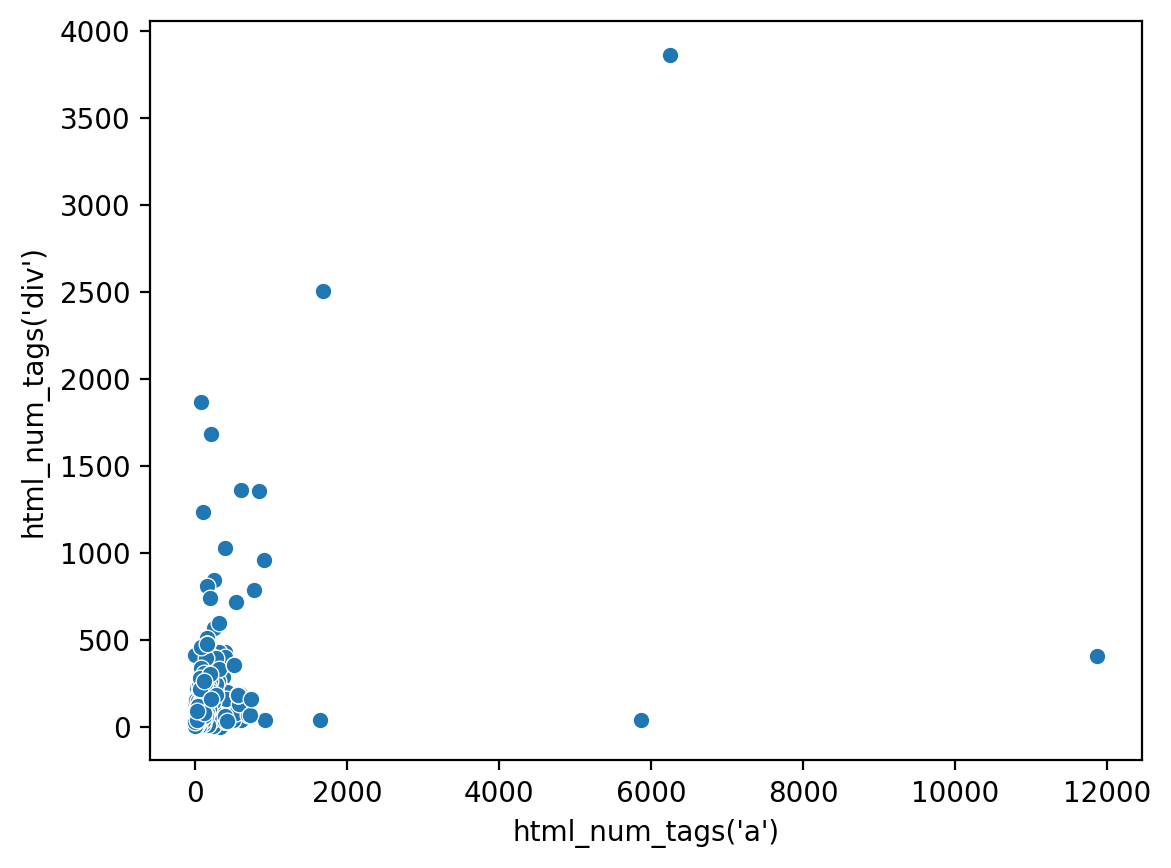

In [42]:
sns.scatterplot(x="html_num_tags('a')",y="html_num_tags('div')", data=test_data)

In [43]:
test_data["html_num_tags('script')"].max()

158.0

In [44]:
test_data["html_num_tags('script')"].min()

0.0

In [45]:
test_data["html_num_tags('script')"].mean()

8.763931104356637

In [46]:
test_data["html_num_tags('script')"].median()

4.0

<AxesSubplot:xlabel="html_num_tags('a')", ylabel="html_num_tags('div')">

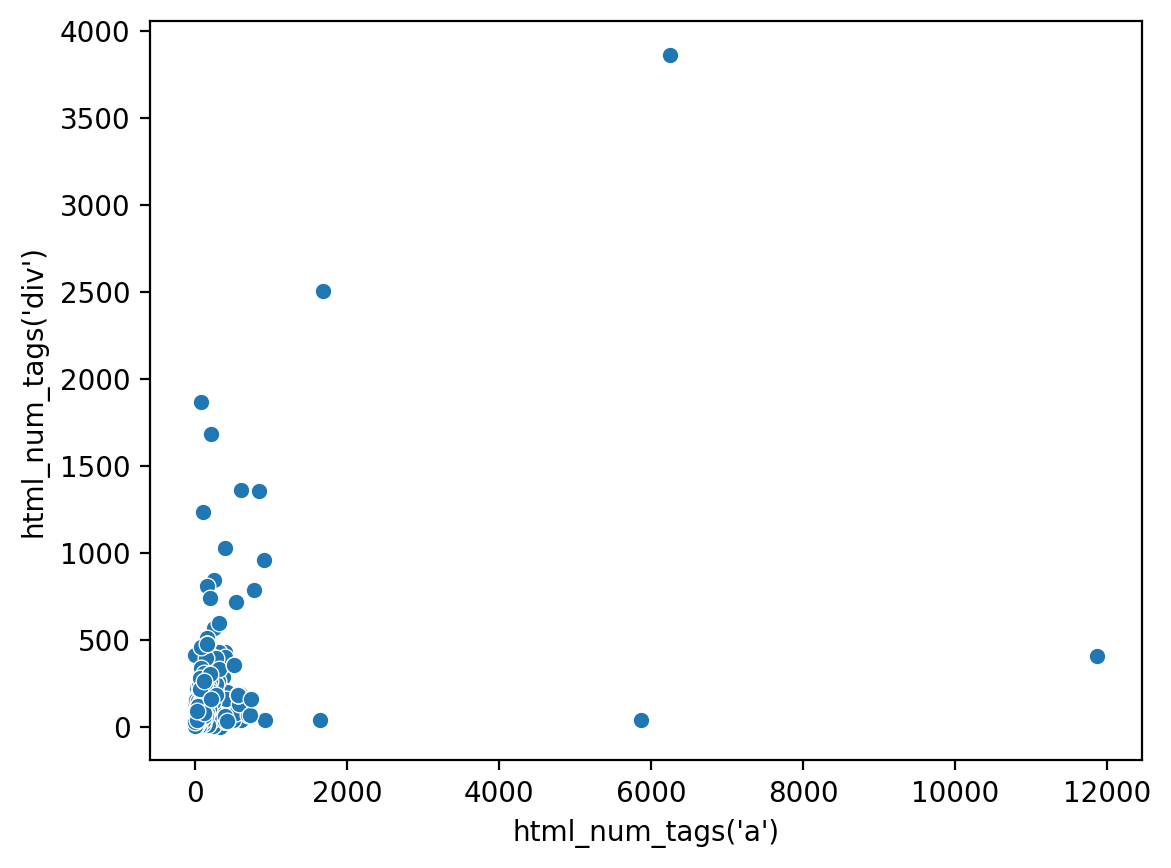

In [47]:
sns.scatterplot(x="html_num_tags('a')",y="html_num_tags('div')", data=test_data)

In [104]:
# "html_num_tags('script')"
test_data.loc[test_data["html_num_tags('script')"].isnull(),"html_num_tags('script')"] = test_data["html_num_tags('script')"].median()

In [106]:
test_data.corr()

,id,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
id,1.000000,-0.018106,-0.008752,-0.029186,0.011118,0.011500,-0.032843,0.014212,0.002151,0.000766,...,0.005143,0.015399,-0.028417,-0.016843,0.038500,-0.020611,-0.037040,0.017098,0.010064,NaN
url_len,-0.018106,1.000000,-0.019285,0.848095,0.041278,0.042405,0.233569,0.360245,0.436731,0.401446,...,0.059416,-0.034973,-0.018379,-0.034092,-0.036667,0.027708,0.047080,0.014908,-0.022839,NaN
url_num_hyphens_dom,-0.008752,-0.019285,1.000000,-0.094565,0.602689,0.603233,-0.086556,-0.066190,0.024104,0.020637,...,-0.065746,-0.113903,-0.058324,-0.062946,-0.000400,0.029801,0.002167,0.057764,-0.038158,NaN
url_path_len,-0.029186,0.848095,-0.094565,1.000000,-0.083281,-0.082324,0.103991,0.153780,0.013133,0.015311,...,0.080491,-0.018587,-0.010334,-0.022368,-0.024239,0.035421,-0.002048,-0.001924,-0.010630,NaN
url_domain_len,0.011118,0.041278,0.602689,-0.083281,1.000000,0.999438,0.034673,-0.070091,0.056351,0.047840,...,-0.041889,-0.071385,-0.012159,-0.034602,-0.001186,-0.007659,0.052404,0.020192,-0.031333,NaN
url_hostname_len,0.011500,0.042405,0.603233,-0.082324,0.999438,1.000000,0.032782,-0.069261,0.056697,0.048269,...,-0.041218,-0.069513,-0.011788,-0.036494,-0.000005,-0.007583,0.052541,0.022462,-0.030827,NaN
url_num_dots,-0.032843,0.233569,-0.086556,0.103991,0.034673,0.032782,1.000000,0.365968,0.286159,0.339343,...,0.004760,-0.085725,-0.029524,-0.019709,-0.089583,-0.024565,-0.034114,-0.088786,-0.042389,NaN
url_num_underscores,0.014212,0.360245,-0.066190,0.153780,-0.070091,-0.069261,0.365968,1.000000,0.499477,0.500507,...,-0.011829,-0.043561,-0.002268,-0.015334,-0.058513,0.019009,0.008656,-0.067010,-0.014733,NaN
url_query_len,0.002151,0.436731,0.024104,0.013133,0.056351,0.056697,0.286159,0.499477,1.000000,0.911999,...,-0.014149,-0.034905,-0.016231,-0.017518,-0.025677,0.003574,0.092019,0.028988,-0.016751,NaN
url_num_query_para,0.000766,0.401446,0.020637,0.015311,0.047840,0.048269,0.339343,0.500507,0.911999,1.000000,...,-0.016889,-0.049467,-0.018736,-0.020220,-0.026887,0.000285,0.088190,0.028738,-0.020022,NaN


In [118]:
test_data.isna().sum()

id                           0
url_len                      0
url_num_hyphens_dom          0
url_path_len                 0
url_domain_len               0
url_hostname_len             0
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')      0
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')           0
html_num_tags('applet')      0
dtype: int64

In [110]:
test_data["html_num_tags('a')"].max()

11868.0

(array([1.975e+03, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1186.8,  2373.6,  3560.4,  4747.2,  5934. ,  7120.8,
         8307.6,  9494.4, 10681.2, 11868. ]),
 <BarContainer object of 10 artists>)

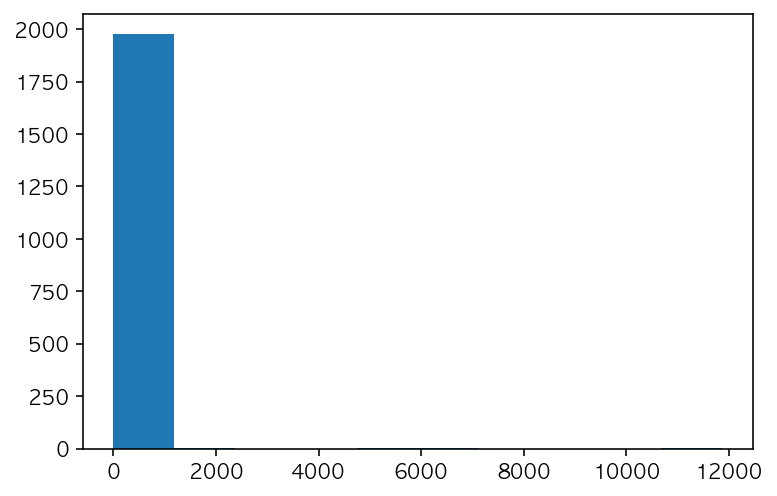

In [111]:
plt.hist(test_data["html_num_tags('a')"])

In [112]:
test_data["html_num_tags('a')"].nunique()

240

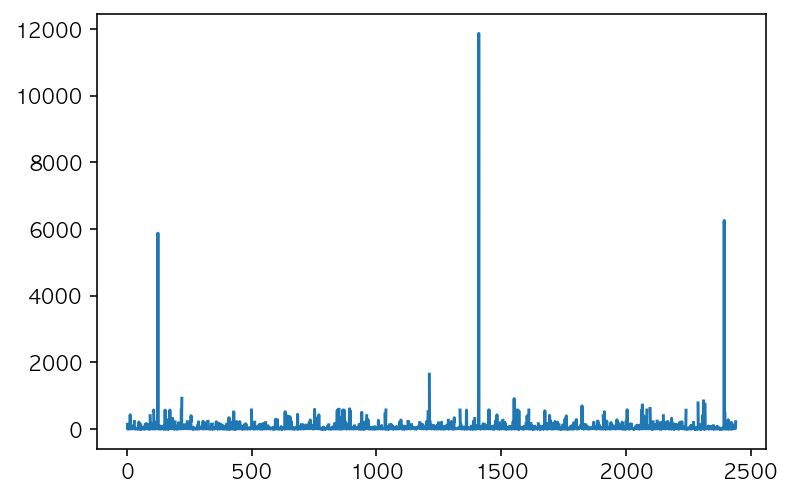

In [114]:
plt.plot(test_data["html_num_tags('a')"])

In [115]:
test_data["html_num_tags('a')"].min()

0.0

In [116]:
test_data["html_num_tags('a')"].median()

15.5

In [117]:
#"html_num_tags('a')" -> median
test_data.loc[test_data["html_num_tags('a')"].isnull(),"html_num_tags('a')"] = test_data["html_num_tags('a')"].median()

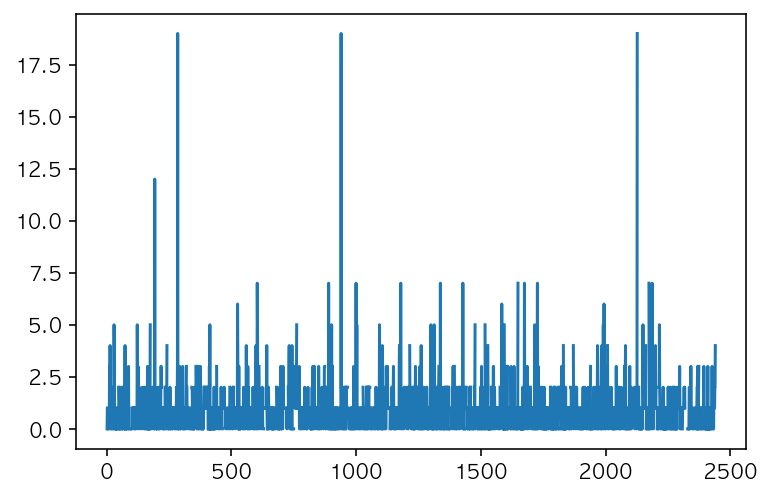

In [119]:
plt.plot(test_data["html_num_tags('form')"])

(array([1.622e+03, 2.900e+02, 4.300e+01, 1.500e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

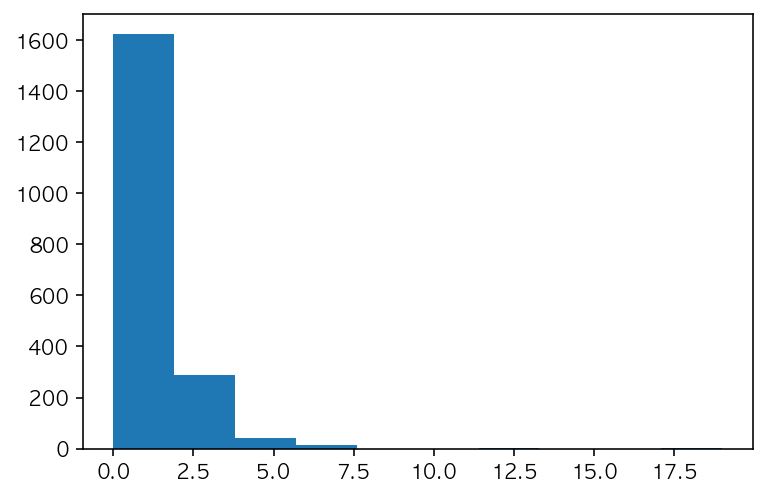

In [120]:
plt.hist(test_data["html_num_tags('form')"])

In [122]:
#"html_num_tags('form')" -> median
test_data.loc[test_data["html_num_tags('form')"].isnull(),"html_num_tags('form')"] = test_data["html_num_tags('form')"].median()

In [123]:
test_data.isna().sum()

id                         0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64

In [124]:
def test_data_prepro():
    '''
    
    '''
    test_data = pd.read_csv('test.csv')
    # url_path_len: Na -> median
    test_data.loc[test_data['url_path_len'].isnull(),'url_path_len'] = test_data['url_path_len'].median()
    #fill na
    test_data['url_hostname_len'] = test_data['url_hostname_len'].fillna(test_data['url_domain_len'])
    
    test_data.loc[test_data['url_hostname_len'].isnull(),'url_hostname_len'] = test_data['url_hostname_len'].median()
    # url_hostname_len: Na -> median
    test_data['url_domain_len'] = test_data['url_domain_len'].fillna(test_data['url_hostname_len'])
    
    # url_domain_len: Na -> median
    test_data.loc[test_data['url_domain_len'].isnull(),'url_domain_len'] = test_data['url_domain_len'].median()
    
    # "html_num_tags('script')"
    test_data.loc[test_data["html_num_tags('script')"].isnull(),"html_num_tags('script')"] = test_data["html_num_tags('script')"].median()
    
    #"html_num_tags('a')" -> median
    test_data.loc[test_data["html_num_tags('a')"].isnull(),"html_num_tags('a')"] = test_data["html_num_tags('a')"].median()
    
    #"html_num_tags('form')" -> median
    test_data.loc[test_data["html_num_tags('form')"].isnull(),"html_num_tags('form')"] = test_data["html_num_tags('form')"].median()
    return test_data

In [125]:
test = test_data_prepro()

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2441 non-null   int64  
 1   url_len                  2441 non-null   int64  
 2   url_num_hyphens_dom      2441 non-null   int64  
 3   url_path_len             2441 non-null   float64
 4   url_domain_len           2441 non-null   float64
 5   url_hostname_len         2441 non-null   float64
 6   url_num_dots             2441 non-null   int64  
 7   url_num_underscores      2441 non-null   int64  
 8   url_query_len            2441 non-null   int64  
 9   url_num_query_para       2441 non-null   int64  
 10  url_ip_present           2441 non-null   int64  
 11  url_entropy              2441 non-null   float64
 12  url_chinese_present      2441 non-null   int64  
 13  url_port                 2441 non-null   int64  
 14  html_num_tags('iframe') 

In [127]:
test.isna().sum()

id                         0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64